### 0 . 토크나이저 로드(나머진 알아서)

In [ ]:
from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast.from_pretrained('gogamza/kobart-base-v1', model_max_length=4014)

### 1. AI HUB 문서요약 텍스트 
#### (https://aihub.or.kr/aidata/8054)

##### 1. 법률 문서

In [32]:
import json 
with open("C:/Users/호양이네/Downloads/문서요약 텍스트/Training/법률_train_original/train_original.json", encoding = "utf-8") as f:
    law = json.load(f)

In [33]:
law

{'name': '법률문서 프로젝트',
 'delivery_date': '2020-12-23 17:23:13',
 'documents': [{'id': '100004',
   'category': '일반행정',
   'size': 'small',
   'char_count': 377,
   'publish_date': '19841226',
   'title': '부당노동행위구제재심판정취소',
   'text': [[{'index': 0,
      'sentence': '원고가 소속회사의 노동조합에서 분규가 발생하자 노조활동을 구실로 정상적인 근무를 해태하고,',
      'highlight_indices': ''},
     {'index': 1, 'sentence': '노조조합장이 사임한 경우,', 'highlight_indices': ''},
     {'index': 2,
      'sentence': '노동조합규약에 동 조합장의 직무를 대행할 자를 규정해 두고 있음에도 원고 자신이 주동하여 노조자치수습대책위원회를 구성하여 그 위원장으로 피선되어 근무시간중에도 노조활동을 벌여 운수업체인 소속회사의 업무에 지장을 초래하고',
      'highlight_indices': '8,9;68,69'},
     {'index': 3,
      'sentence': '종업원들에게도 나쁜 영향을 끼쳐 소속회사가 취업규칙을 위반하고',
      'highlight_indices': ''},
     {'index': 4,
      'sentence': '고의로 회사업무능률을 저해하였으며 회사업무상의 지휘명령에 위반하였음을 이유로 원고를 징계해고 하였다면,',
      'highlight_indices': '0,3'},
     {'index': 5,
      'sentence': '이는 원고의 노동조합 활동과는 관계없이 회사취업규칙에 의하여 사내질서를 유지하기 위한 사용자 고유의 징계권에 기하여 이루어진 정당한 징계권의 행사로 보아야 한다.',
    

In [20]:
law_text = law["documents"]

In [21]:
len(law_text)

24329

In [22]:
full_document_law = []
for num, document in enumerate(law_text):
    paragraph_list = []
    for paragraph in document["text"]:
        sentences = [text["sentence"] for text in paragraph]
        sentences = " ". join(sentences)
        paragraph_list.append(sentences)
    full_paragraph = " ". join(paragraph_list)
    full_document_law.append(full_paragraph)

In [23]:
full_document_len = [len(texts) for texts in full_document_law]

In [24]:
max(full_document_len)

3993

In [26]:
len([len_ for len_ in full_document_len if len_ > 3000])

52

C:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

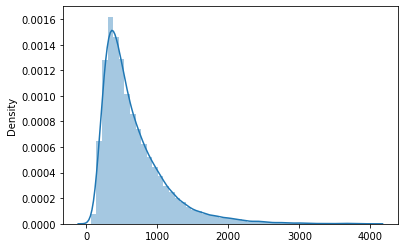

In [106]:
import seaborn as sns
sns.distplot(full_document_len)

#### 2. 사설

In [109]:
import json 
with open("C:/Users/호양이네/Downloads/문서요약 텍스트/Training/사설_train_original/train_original.json", encoding = "utf-8") as f:
    column = json.load(f)

In [110]:
column_text = column["documents"]
full_document_column = []
for num, document in enumerate(column_text):
    paragraph_list = []
    for paragraph in document["text"]:
        sentences = [text["sentence"] for text in paragraph]
        sentences = " ". join(sentences)
        paragraph_list.append(sentences)
    full_paragraph = " ". join(paragraph_list)
    full_document_column.append(full_paragraph)

In [111]:
full_document_column_len = [len(texts) for texts in full_document_column]

In [27]:
mean(full_document_column_len)
len([len_ for len_ in full_document_column_len if len_ > 3000])

NameError: name 'full_document_column_len' is not defined

C:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

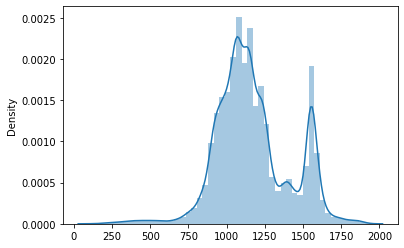

In [113]:
sns.distplot(full_document_column_len)

#### 3. 뉴스 기사

In [114]:
import json 
with open("C:/Users/호양이네/Downloads/문서요약 텍스트/Training/신문기사_train_original/train_original.json", encoding = "utf-8") as f:
    news = json.load(f)

In [115]:
news_text = news["documents"]
full_document_news = []
for num, document in enumerate(news_text):
    paragraph_list = []
    for paragraph in document["text"]:
        sentences = [text["sentence"] for text in paragraph]
        sentences = " ". join(sentences)
        paragraph_list.append(sentences)
    full_paragraph = " ". join(paragraph_list)
    full_document_news.append(full_paragraph)

In [116]:
full_document_len = [len(texts) for texts in full_document_news]

In [ ]:
len([_len_ for _len_ in full_document_len if _len_ > 2000])

In [122]:
from numpy import mean
full_document_len = [_len_ for _len_ in full_document_len if _len_ <2000]
mean(full_document_len)

1006.7795411136888

C:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

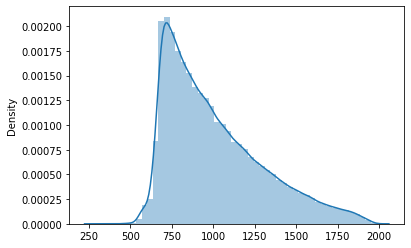

In [123]:
sns.distplot(full_document_len)

### 2. Dacon 뉴스요약 데이터셋
#### Kobart Summarization 사용 (https://github.com/seujung/KoBART-summarization)

In [28]:
import pandas as pd
newses = pd.read_csv("C:/Users/호양이네/Downloads/train.jsonl-Grid view.csv")

In [29]:
from ast import literal_eval

In [31]:
newses

,media,id,article_original,abstractive,extractive
0,당진시대,327827480,['당진시 문화관광과를 대상으로 하는 행정사무감사에서 당진시립합창단 관계자가 보낸 ...,지난 6일 당진시의회 행정사무감사에서 '합창단이 소리를 작게 낼 것이니 알고 있으라...,"[0, 1, 2]"
1,국제신문,339840364,['미국 메이저리그(MLB)에서 활동하는 한국 선수들의 시즌 초반 희비가 엇갈리고 ...,LA 에인절스의 최지만이 맹활약을 하여 시즌 타율 0.250에서 0.313으로 올리...,"[0, 1, 3]"
2,기호일보,371071597,"['인천 부영공원 운영 생활야구협회 80여 동호회 팀에 260만 원씩 받아', '국...",16일 부평구와 협회 등에 따르면 부영공원 안에 있는 야구장을 구생활체육야구협회가 ...,"[6, 7, 10]"
3,대구일보,354806783,['대구·경북첨단의료산업진흥재단 의약생산센터는 항암주사제 무균충전 시설을 갖추고 있...,대구·경북첨단의료산업진흥재단 의약생산센터는 약사법 시행규칙에서 정한 바에 따라 전용...,"[1, 6, 4]"
4,대구신문,347022773,['국내 유통되는 탄산음료 중 식품의약품안전처에 품질인증을 받은 제품이 하나도 없는...,식품의약품안전처는 29일 어린이가 즐겨마시는 음료를 대상으로 영양성분을 조사한 결과...,"[2, 3, 10]"


In [30]:
literal_eval(newses.article_original[0])

['당진시 문화관광과를 대상으로 하는 행정사무감사에서 당진시립합창단 관계자가 보낸 것으로 추정되는 문자와 관련해 당진시의회가 행정사무조사특별위원회를 구성해 조사하겠다고 밝혔다.',
 '당진시의회 행정사무감사 3일차였던 지난 6일 문화관광과를 대상으로 하는 행감에서 최창용 의원은 “(당진시립합창단 정기연주회를 앞두고) 문자메세지를 제보받았다”며 “(음향팀에 보낸 것으로 추정되는) 해당 문자에는 ‘합창단이 소리를 작게 낼 것이니 알고 있으라’는 내용이었다”고 말했다.',
 '이어 “공연에서 소리를 작게 낸다는 것은 합창단으로서 그 임무를 하지 않겠다는 것”이며 “공연 자체를 무력화해 당진시를 망신 주려는 행위”라며 해당 문자를 보낸 단원 등 연루된 사람들을 찾아 사실관계를 확인하고 징계 등 책임을 물어야 한다고 지적했다.',
 '문제의 문자메세지를 전달받은 문화관광과는 감사법무담당관에게 조사를 의뢰했다.',
 '권경선 문화관광과장은 “누가, 어떻게 해서 해당 문자가 나온 것인지 정확히 조사해봐야 알 수 있다”며 “전달받은 문자 내용도 최 의원이 언급한 부분만 있어, 중간 내용만을 가지고는 전체를 유추할 수 없다”고 전했다.',
 '하지만 감사법무담당관실에서 아직 조사가 이뤄지지 않고 있어 당진시가 사태의 심각성을 인지하지 못하고 있다는 지적이다.',
 '그동안 행정사무감사가 진행되고 있어 사태를 지켜봤다던 감사법무담당관실에서는 “관계된 사람들을 조사해 사태를 파악해야 하는데, 아직 조사에 대한 뚜렷한 계획이 없다”고 답했다.',
 '한편 행감이 끝난 지난 12일 당진시의회에서는 당진시립합창단 문제를 비롯해 구체적인 조사가 필요한 부분에 대해 행정사무조사특별위원회를 구성해 운영하겠다고 밝혔다.',
 '김기재 의장은 “본회의 의결과 제적의원 1/3의 발의가 있으면 행정사무조사특별위원회를 구성할 수 있다”며 “다음 달 초 위원들과 상의해 위원회를 구성한다면 당진시립합창단 관련 사안을 비롯해 사회복지기관 위수탁 등에 대해 다룰 계획”이라고 말했다.']

In [9]:
full_newses = [literal_eval(line) for line in newses.article_original]

In [13]:
full_newses = [" ".join(texts) for texts in full_newses]

In [14]:
full_newses_len = [len(texts) for texts in full_newses]

In [16]:
max(full_newses_len)

1320

### 3. 도서자료 요약 데이터셋
#### (https://aihub.or.kr/aidata/30713)

In [4]:
main_dir = "C:/Users/호양이네/Downloads/도서자료 요약/Training/[원천]도서요약_train/"

#### 3-1. 기술과학

In [26]:
import json 
with open("C:/Users/호양이네/Downloads/도서자료 요약/Training/[원천]도서요약_train/기술과학/PCY_201806050525308161_49.json", encoding = "utf-8") as f:
    tech = json.load(f)

In [27]:
tech

{'passage_id': 'PCY_201806050525308161_49',
 'metadata': {'doc_id': 'PCY_201806050525308161',
  'doc_type': '도서',
  'doc_name': '지속가능한 갯벌어업을 위한 로드맵 마련 연구 : 갯벌어업 패류양식을 중심으로 (Research on the Establishment of a Roadmap for Sustainable Fisheries at Mudflats: Shellfish Aquaculture)',
  'author': '마창모, 이상철, 정수빈, 윤미경, 황수연',
  'publisher': '한국해양수산개발원',
  'published_year': '2017',
  'kdc_label': '해양수산·어촌',
  'kdc_code': '500'},
 'chapter': None,
 'passage': '어장재배치란 면허를 받은 어장에 대해서 어장관리법 제5조에 따라 어장관리 해역의 지정을 통해서 어장을 새로이 배치하는 것을 말한다. 양식시설이 밀집되어 대량 폐사가 발생하는 해역 및 어장에 대해서 환경수용력을 측정하여 어장을 재배치하여 어장환경을 개선하기 위한 조치이다. 어장재배치의 국내 사례로는 완도군에서 2018년까지 약 116억 원을 투입하여 내만의 전복양식장과 외만의 해조류양식장을 맞교환하는 방식으로 진행한다. 고흥군 또한 김 양식어장의 재배치를 추진 중에 있다. 갯벌어장의 경우 면허지와 어장환경 변화로 인해서 실제 품종 생산해역의 괴리로 어장 이외의 지역에서 양식이 이루어지고 있는 경우가 많다. 따라서 갯벌에서 생산되는 주요 품목에 대한 어장 적지 조사를 바탕으로 면허지를 조정함으로써 지속가능한 패류양식이 가능하도록 하기 위해 어장재배치 사업이 필요하다. 갯벌 어장 재배치는 양식면허가 지자체 관할사항이므로 지자체 특별회계를 이용하여 지원한다. 갯벌 어장 재배치를 위해서 품종별 어장의 실태 파악 후, 어업인을 대상으로 어장 재배치 수요조사를 수행하여, 재배

In [13]:
import os
from tqdm.notebook import tqdm
tech_dir = "기술과학/"
tech_file_list = os.listdir(main_dir+tech_dir)

tech_corpus = []
tech_label = []

def substitute_none(tech : str) :
    if tech :
        return tech
    else :
        return " "

for file_dir in tqdm(tech_file_list) :
    full_dir = main_dir + tech_dir + file_dir
    with open(full_dir, encoding = "utf-8") as f:
        tech_file = json.load(f)

        tech_headline = tech_file["chapter"]
        tech_passage = tech_file["passage"]
        tech_summary = tech_file["summary"]

        tech_headline = substitute_none(tech_headline)
        tech_passage = substitute_none(tech_passage)
        tech_summary = substitute_none(tech_summary)

        tech_corpus.append(tech_headline + tech_passage)
        tech_label.append(tech_summary)

  0%|          | 0/23918 [00:00<?, ?it/s]

In [14]:
tech_corpus_len = [len(corpus) for corpus in tech_corpus]
tech_label_len = [len(corpus) for corpus in tech_label]

In [30]:
print(max(tech_corpus_len))
print(max(tech_label_len))

1042
301


#### 3-2. 기타 

In [33]:
import json 
with open("C:/Users/호양이네/Downloads/도서자료 요약/Training/[원천]도서요약_train/기타/CNTS-00078235809_27.json", encoding = "utf-8") as f:
    guitar = json.load(f)

In [34]:
import os
from tqdm.notebook import tqdm
guitar_dir = "기타/"
guitar_file_list = os.listdir(main_dir+guitar_dir)

guitar_corpus = []
guitar_label = []

def substitute_none(guitar : str) :
    if guitar :
        return guitar
    else :
        return " "

for file_dir in tqdm(guitar_file_list) :
    full_dir = main_dir + guitar_dir + file_dir
    with open(full_dir, encoding = "utf-8") as f:
        guitar_file = json.load(f)

        guitar_headline = guitar_file["chapter"]
        guitar_passage = guitar_file["passage"]
        guitar_summary = guitar_file["summary"]

        guitar_headline = substitute_none(guitar_headline)
        guitar_passage = substitute_none(guitar_passage)
        guitar_summary = substitute_none(guitar_summary)

        guitar_corpus.append(guitar_headline + guitar_passage)
        guitar_label.append(guitar_summary)

  0%|          | 0/6753 [00:00<?, ?it/s]

In [39]:
guitar_corpus_len = [len(corpus) for corpus in guitar_corpus]
guitar_label_len = [len(corpus) for corpus in guitar_label]
print(max(guitar_corpus_len))
print(max(guitar_label_len))

1061
299


#### 3-3. 사회과학

In [54]:
import json 
with open("C:/Users/호양이네/Downloads/도서자료 요약/Training/[원천]도서요약_train/사회과학/PCY_201501220928171441_124.json", encoding = "utf-8") as f:
    social = json.load(f)
social

{'passage_id': 'PCY_201501220928171441_124',
 'metadata': {'doc_id': 'PCY_201501220928171441',
  'doc_type': '도서',
  'doc_name': '정신장애인 인권증진을 위한 토론회 - 비자의입원제도, 지역사회 정신보건체계 개선을 중심으로',
  'author': None,
  'publisher': '국가인권위원회',
  'published_year': None,
  'kdc_label': '국민권익·인권',
  'kdc_code': '300'},
 'chapter': None,
 'passage': '2013년부터 2014년까지 한국사회복귀시설협회가 국가인권위원회나 국회 보건복지위원과 법률개정을 한 사항이 있다. 2013년 1월 국민기초생활보장법을 개정하여 장애인복지법 상의 장애인복지관과 장애인직업재활시설만 받고 있던 기초생활수급자 소득 감면 50%제도 대상에 사회복귀시설의 직업재활시설과 주간재활시설을 포함하였다. 또한 2014년 4월 29일 중증장애인생산품 우선구매제도 특별법 일부개정안이 통과되면서 정신질환자직업재활시설을 중 증장애인생산품 생산시설 지정 대상에 포함하게 되었다. 같은 장애인이면서도 정신보건법의 대상이었던 정신장애인들은 장애인에게 당연히 제공되는 서비스를 못 받거나 제한적으로 받고 있는 상황이었으며, 이는 장애인으로 포함되고 13-4년이 지나서야 개정이 되었고 이러한 개정도 약 1년간의 작업을 통하여 가능하게 되었다. 이처럼 여전히 의료적인 접근이 중심이 되면서 지역사회에 대한 접근과 지원은 여전히 이슈가 되지 못하고 있는 상황이다. 예를 들어 중증장애인 직업재활지원사업 직업능력개발훈련기관 신규기관 선정과 자립훈련에 따른 훈련비 지급 , 장애인직업재활시설 경영컨설팅 등에서 여전히 서비스를 받지 못하고 있는 상황이다. 또한 한국장애인개발원에서 중증장애인을 대상으로 중증장애인의 직업능력 을 향상시키고, 중증장애인의 신규 일자리창출에 기여할 수 있는 중증장애인직업

In [43]:
import os
from tqdm.notebook import tqdm
social_dir = "사회과학/"
social_file_list = os.listdir(main_dir+social_dir)

social_corpus = []
social_label = []

def substitute_none(social : str) :
    if social :
        return social
    else :
        return " "

for file_dir in tqdm(social_file_list) :
    full_dir = main_dir + social_dir + file_dir
    with open(full_dir, encoding = "utf-8") as f:
        social_file = json.load(f)

        social_headline = social_file["chapter"]
        social_passage = social_file["passage"]
        social_summary = social_file["summary"]

        social_headline = substitute_none(social_headline)
        social_passage = substitute_none(social_passage)
        social_summary = substitute_none(social_summary)

        social_corpus.append(social_headline + social_passage)
        social_label.append(social_summary)

  0%|          | 0/115440 [00:00<?, ?it/s]

In [44]:
social_corpus_len = [len(corpus) for corpus in social_corpus]
social_label_len = [len(corpus) for corpus in social_label]
print(max(social_corpus_len))
print(max(social_label_len))

1071
390


#### 3-4. 예술

In [52]:
import json 
with open("C:/Users/호양이네/Downloads/도서자료 요약/Training/[원천]도서요약_train/예술/CNTS-00061098077_23.json", encoding = "utf-8") as f:
    art = json.load(f)
art

{'passage_id': 'CNTS-00061098077_23',
 'metadata': {'doc_id': 'CNTS-00061098077',
  'doc_type': '도서',
  'doc_name': '제한상영관 도입에 관한 연구',
  'author': '유지나',
  'publisher': '영화진흥위원회',
  'published_year': '2000',
  'kdc_label': '공연예술 및 매체예술',
  'kdc_code': '680'},
 'chapter': None,
 'passage': 'Roth-Memoirs 판례 등에서 살펴본 바와 같이 대부분의 판사들은 음란물은 사회적인 가치가 결여되어 있기 때문에 규제되어야 한다고 주장하였다. 이와 같은 주장은 그 후 1973년 ‘Miller Vs. Calif 재판’과 1974년 ‘Hamling Vs. U.S. 재판’에서 음란물은 위해한 것이기 때문에 금지되어야만 한다고 판결함으로써 Roth-Memoirs 판례에서보다 완강한 자세를 취하게 되었는데 이들 판례기준을 일컬어 ‘Miller-Hamling 기준’이라고 한다. 미연방 대법원의 Warren Burger 판사에 의해 제창된 이 기준은 1953년의 Roth 판례 이래 대법원 판사들의 판례에 가장 많은 영향을 미치게 되었다. 이 기준 역시 Roth-Memoirs 기준에서처럼 크게 세 가지 유형으로 음란성의 판단기준을 분류하고 있다. 첫째, 음란물은 그 시대의 사회가치를 지닌 일반사람들에게 작품의 대부분이 성적인 호기심을 유발시키는 경우이다. 이 기준이 적용되는 사회가치란 현실성이 없는 국가적 가치가 아니라 지역사회의 가치규범으로 규정하였다. 둘째, 어떤 작품이 외설로 간주되려면 그 작품이 주 정부의 법에 의해 구체적으로 명시된 조항에 명백하게 위반된 방법으로 성적 행위를 묘사한 경우여야 한다. 셋째, 문제가 되는 작품은 문학적․예술적․정치적, 그리고 과학적인 가치가 결여되어 있어야 한다. 이는 사회적 가치를 전혀 지니지 못해야 한다는 과거의 

In [49]:
import os
from tqdm.notebook import tqdm
art_dir = "사회과학/"
art_file_list = os.listdir(main_dir+art_dir)

art_corpus = []
art_label = []

def substitute_none(art : str) :
    if art :
        return art
    else :
        return " "

for file_dir in tqdm(art_file_list) :
    full_dir = main_dir + art_dir + file_dir
    with open(full_dir, encoding = "utf-8") as f:
        art_file = json.load(f)

        art_headline = art_file["chapter"]
        art_passage = art_file["passage"]
        art_summary = art_file["summary"]

        art_headline = substitute_none(art_headline)
        art_passage = substitute_none(art_passage)
        art_summary = substitute_none(art_summary)

        art_corpus.append(art_headline + art_passage)
        art_label.append(art_summary)

  0%|          | 0/115440 [00:00<?, ?it/s]

In [50]:
art_corpus_len = [len(corpus) for corpus in art_corpus]
art_label_len = [len(corpus) for corpus in art_label]
print(max(art_corpus_len))
print(max(art_label_len))

1071
390


### 4. 논문 자료요약
#### (https://aihub.or.kr/aidata/30712/download)

In [4]:
import json 
with open("C:/Users/호양이네/Downloads/논문자료 요약/Training/training_논문/논문요약_0206_0.json", encoding = "utf-8") as f:
    paper = json.load(f)


In [5]:
paper["data"][5]

{'doc_type': '논문',
 'doc_id': 'A201008176699',
 'title': '창의적 문제해결 기반 피지컬컴퓨팅 교육프로그램 설계원리 개발 및 적용',
 'date': '2018',
 'reg_no': 'ART002389321',
 'ipc': '사회과학',
 'issued_by': '한국교육공학회',
 'author': '박태정 /Tae-Jung Park (단독)',
 'summary_entire': [{'orginal_text': '새로 도입된 피지컬컴퓨팅 교육을 통해 학생들이 창의적으로 문제를 해결하거나 다양한 창조적 결과를 산출할 수 있도록 교사들이 어떻게 체계적으로 수업 준비 및 진행을 할 것인지에 대한 실제적인 안내가 필요하다. 이를 위해 본 연구는 초·중등 학생들의 창의적 문제해결을 위한 피지컬컴퓨팅 수업 설계원리를 개발하고 수업현장에 적용하고자 하였다. 우선, 현존 문헌 및 사례를 분석결과를 유목화하고 구조화하여 초기 구성요소 및 설계원리를 도출한 다음, 학계, 교사, 현업 전문가 5인의 전문가 검토를 거쳐 수정·보완하였다. 수정된 구성요소인 협력적 학습환경 설계, 실제적 문제 설계 및 정보·교구 분석, 창의적 사고도구 활용, 프로토타입 기법 적용 및 다각적 평가 및 성찰·공유 촉진은 각 2-3개의 설계원리를 포함한다. 5개의 구성요소와 11개의 설계원리를 반영하여 8주차 16차시로 구성된 피지컬컴퓨팅 교육프로그램을 설계한 다음, 중학교 방과 후 수업에 적용하여 참여 학생들의 반응으로 창의적 자아효능감을 평가하였다. 이러한 연구 결과를 바탕으로 피지컬컴퓨팅을 포함한 소프트웨어 교육을 위한 시사점을 도출하였고 추후 실증적 연구를 통해 개발된 설계원리의 효과성을 검증할 필요가 있음을 제시하였다.',
   'summary_text': '본 논문은 초·중등 학생들의 창의적 문제해결을 위한 피지컬컴퓨팅 수업 설계원리를 개발하고 수업현장에 적용하였다. 기존 문헌과 사례의 분석결과를 유목화하고 구조화하여 초기 구성요소 및 설계원리를 

In [6]:
import json 
with open("C:/Users/호양이네/Downloads/논문자료 요약/Training/training_논문/논문요약_0225_5_1.json", encoding = "utf-8") as f:
    papers = json.load(f)


In [7]:
papers["data"][5]

{'doc_type': '논문',
 'doc_id': 'A220223614311',
 'title': '부유식 해상구조물 활용 해상추모공원 개발에 따른 해양관광 활성화 방안',
 'date': '2017',
 'reg_no': 'ART9002281760',
 'ipc': '사회과학',
 'issued_by': '한국도서(섬)학회',
 'author': '이웅규 /Woongkyu Lee',
 'summary_entire': [{'orginal_text': '본 연구는 장사(葬事)문화의 변인 중 가장 취약한 입지공간을 해양에 조성하면서 죽음의 유의미한 가치를 삶의 공간으로 재탄생시키고, 살아 있는 사람들의 현재뿐만 아니라 우리나라의 미래 영토확장의 새로운 개념으로 반추하는 장소로 만들기 위해 부유식 해상구조물을 활용한 해상추모공원의 개발방안을 고찰하였다. 초대형 부유식 해상구조물을 활용하여 우리나라 국토의 많은 부분을 차지하고 있는 해양공간 내에 새로운 추모시설을 도입함으로써, 차후의 부족한 묘지공간 조성을 위한 계획 컨셉과 국토공간 활용정책의 전환과 유연성을 가능하게 하면서 해양관광 활성화 기회를 제공할 수 있다는 전제하에 추진되었다. 본 연구에서는 혐오시설 내지는 비선호시설로 각인된 화장장, 장례식장, 납골당 등을 하나의 공간에 집적화하여 해상추모공원화하여 건립함으로써 사회의 부정적 인식으로부터 벗어나는 계기를 마련하고자 하는데 있다. 또한 부유식 해상구조물을 활용한 테마파크형 해상추모공원 개발로 해양관광 활성화 방안을 제시함으로써 우리사회의 추모공원에 대한 인식을 전환시키는데도 기여하고자 한다. 특히, 추모 환경의 제반 공급조건 중 부정적 인식에 따른 입지문제를 해결하고 국토공간의 효율적 활용이라는 측면에서 해양공간에 조성할 해상추모공원 관련 기초 자료를 연구하였다. 우리나라의 장사(葬事)문화와 해상추모공원 개발에 대한 전문가 52명과의 면담을 통해 비구조화된 질문형식으로 그들의 부유식 해상추모공원 개발 의견을 묻고 답한 결과를 분석하였다. 이를 통해 해상추

In [10]:
summary_corpus = []
summary_label = []

section_corpus = []
section_label = []

papers_dir = "C:/Users/호양이네/Downloads/논문자료 요약/Training/training_논문/"
papers_file_dir = os.listdir(papers_dir)
from tqdm.notebook import tqdm

for papers_file in papers_file_dir : 
    with open(papers_dir + papers_file, encoding = "utf-8") as f:
        papers = json.load(f)

    for paper in tqdm(papers["data"]) :
        summary_entire = paper["summary_entire"]
        summary_section = paper["summary_section"]
        
        assert len(summary_entire) + len(summary_section) == 2, "문서 수가 더 많음"
        try:
            summary_original = summary_entire[0]["original_text"]
            summary_summary = summary_entire[0]["summary_text"]
        except:
            summary_original = summary_entire[0]["orginal_text"]
            summary_summary = summary_entire[0]["summary_text"]

        try:
            section_original_= summary_section[0]["original_text"]
            section_summary = summary_section[0]["summary_text"]
        except:
            section_original_= summary_section[0]["orginal_text"]
            section_summary = summary_section[0]["summary_text"]

        summary_corpus.append(summary_original)
        summary_label.append(summary_summary)
        section_corpus.append(section_original_)
        section_label.append(section_summary)

  0%|          | 0/32000 [00:00<?, ?it/s]

  0%|          | 0/32000 [00:00<?, ?it/s]

  0%|          | 0/6259 [00:00<?, ?it/s]

  0%|          | 0/10021 [00:00<?, ?it/s]

  0%|          | 0/32000 [00:00<?, ?it/s]

  0%|          | 0/32000 [00:00<?, ?it/s]

In [11]:
summary_corpus_len = [len(corpus) for corpus in summary_corpus]
summary_label_len = [len(corpus) for corpus in summary_label]

section_corpus_len = [len(corpus) for corpus in section_corpus]
section_label_len = [len(corpus) for corpus in section_label]

In [12]:
from numpy import median, mean

In [16]:
len([len_ for len_ in summary_corpus_len if len_ > 2000])

517

In [17]:
len(summary_corpus_len)

144280

In [13]:
print(max(summary_corpus_len))
print(max(summary_label_len))
print(max(section_corpus_len)) 
print(max(section_label_len))

4672
1062
1447
719


C:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

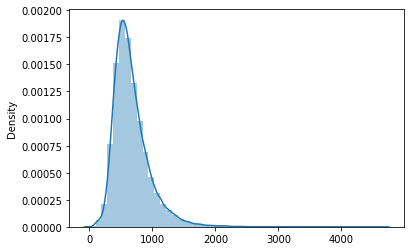

In [14]:
import seaborn as sns
sns.distplot(summary_corpus_len)

C:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

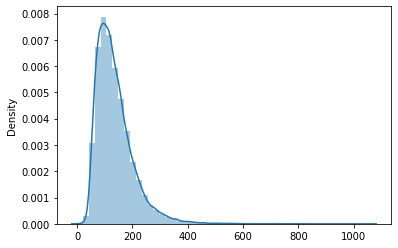

In [15]:
sns.distplot(summary_label_len)
